<a href="https://colab.research.google.com/github/subhra-15/Introduction-to-Machine-Learning/blob/master/Data_Exploration_of_the_target_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why Data Exploration is important?**

1. Understanding the data and make sure it is ready to be used in the model.
2. A model will be as good as the data it is built on.

**Exploring the target variable**

There are following question that we need to answer while exploring the target variable:-

1. What information this variable represent?
2. What is the data type of the variable?
3. Do the few value that we eyeball(skim through) make sense?
4. What are the minimum, maximum, mean and median value for this variable and whether it makes sense or not
5. Does the target variable contains any outlier the we need to treat
6. Are there any missing value in the target variable that we need to treat
7.What is the ditribution of the variable over the range.Are the variable uniformly and normally distributed or the data is skewed towards lower value or towards higher value. 

# **Importing Data**

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving 1. Regression - Module - (Housing Prices).csv to 1. Regression - Module - (Housing Prices).csv


In [ ]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['1. Regression - Module - (Housing Prices).csv']))
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


**Answer with reference to our target variable**

1. Target Variable:- Sale Price
2. Information:- Sale price of the house
3. **Eyeballing**:- Skimming through the variable of the intrest and see whether you notice any pattern and anamoly by just looking at the data.

# **Eyeballing**

In [ ]:
df['Sale Price'].head(10) # it will show the top 10 values of the sale price column

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [ ]:
df['Sale Price'].tail(10) # it will show last 10 value of the sale price column

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

# **Descriptive Analysis**

In [ ]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

# **Outliers**
An outlier is the data point that is distance from other data points. Its value lie outside the usual range of the rest of the values in the data and hence termed as outlier

for that we will plot the scatter plot for the target variable sale price

Outliers need not mean only unusual high value it can be unusual low value too

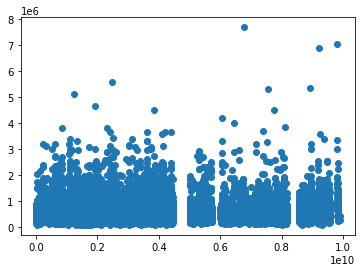

In [ ]:
import matplotlib.pyplot as plt
x= df['ID']
y= df['Sale Price']
plt.scatter(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


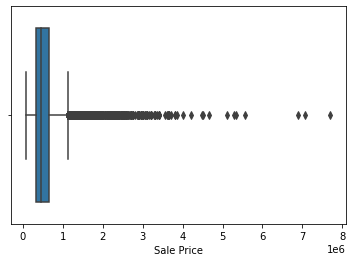

In [ ]:
import seaborn as sns 
x= df['Sale Price']
sns.boxplot(x)

# **Different ways to treat outliers**

1. Deletion:- 

*   entire row containing the outlier is removed
*   data size is reduced
*   Valuable information may lost in this process
*   List item

---

2. Capping or Imputing:- 

*   Outlier is not removed but replaced with the average value or median value or mode value or limit value whichever make the least impact on the variable

---
3. Data Transformation
 

*   The variable is transfered to its log value or square value since log and square of the outlier is likely to range log and square of the data points


---
4. Binning
* different bins are formed based on the values of the variable treat the outliers



















# **Treating of the outlier by imputing**

In [ ]:
q1= df['Sale Price'].quantile(0.25)
q3=df['Sale Price'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr


In [ ]:
def limit_imputer(value):
  if value> upper_limit:
    return upper_limit
  if value<lower_limit:
    return lower_limit
  else:
    return value

In [ ]:
df['Sale Price']=df['Sale Price'].apply(limit_imputer)

In [ ]:
df['Sale Price'].describe

<bound method NDFrame.describe of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, Length: 21613, dtype: float64>

In [ ]:
df['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1129575.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


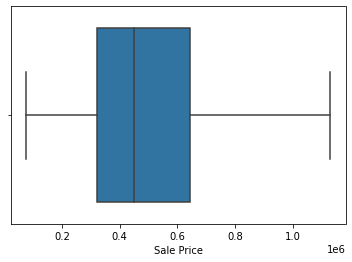

In [ ]:
#outlier is treated looking at the box plot again
x= df['Sale Price']
sns.boxplot(x)

# **Treating the missing value**

whenever the value are not present or not available for a variable in a particular observation the variable is said to contain missing value

*   The missing value can reduce the performance of the model 
*   Any row containg the missing value either for the target variable or the independent variable cannot be used for building the model
* Missing value should be treated
* There are two methods of treating the missing value 

1.   Deletion: the entire row containg the missing value is deleted. In this the data size is reduced, valuable information may be lost
2.   Imputing: the missing value row is not removed but the missing value is replaced with the average value or median or mode value

**We avoid imputing the target variable this may affect the performance of the model. We gemerally prefer deletion of the row in the missing target variable**




In [ ]:
#code for deleting the row of missing target variable
df.dropna(inplace=True,axis=0,subset=['Sale Price'])

# inplace: changes will be made in original dataset
# axis: row wise deletion will take place

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

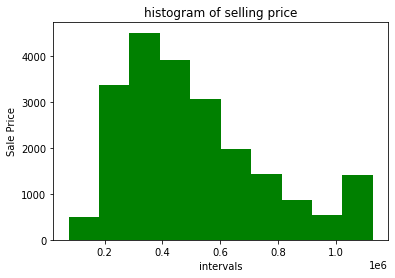

In [ ]:
plt.hist(df['Sale Price'],bins=10,color='green')
plt.xlabel('intervals')
plt.ylabel('Sale Price')
plt.title('histogram of selling price')
plt.show()

The data in above graph is skewed towards lower value (that is it is towards the LHS of the graph)